In [3]:
import pandas as pd
#from pandas_profiling import ProfileReport
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [4]:
raw_train_features = pd.read_csv('/Users/pamelachavez/AllWomen/Module3/Project2/train_values.csv')
raw_train_labels = pd.read_csv('/Users/pamelachavez/AllWomen/Module3/Project2/train_labels.csv')
raw_test_features = pd.read_csv('/Users/pamelachavez/AllWomen/Module3/Project2/test_values.csv')


### Dealing with categorical variables

In [5]:
# One hot encoding of categorical variables

def hot_encode(df, lst):
    for i in lst:
        variable_df = pd.get_dummies(df[i], prefix = i)
        df = pd.concat([df, variable_df], axis=1)
        df = df.drop([i], axis=1)
    return df

categorical_features = ['foundation_type', 'land_surface_condition', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status']
extended_train_features = hot_encode(raw_train_features, categorical_features)

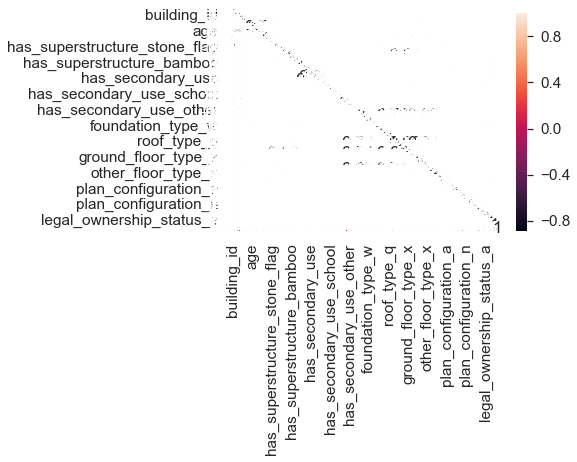

In [37]:
sns.heatmap(extended_train_features.corr(), annot=True)

In [2]:
distributionPlot(extended_train_features.iloc[:, : 10], 5)

NameError: name 'distributionPlot' is not defined

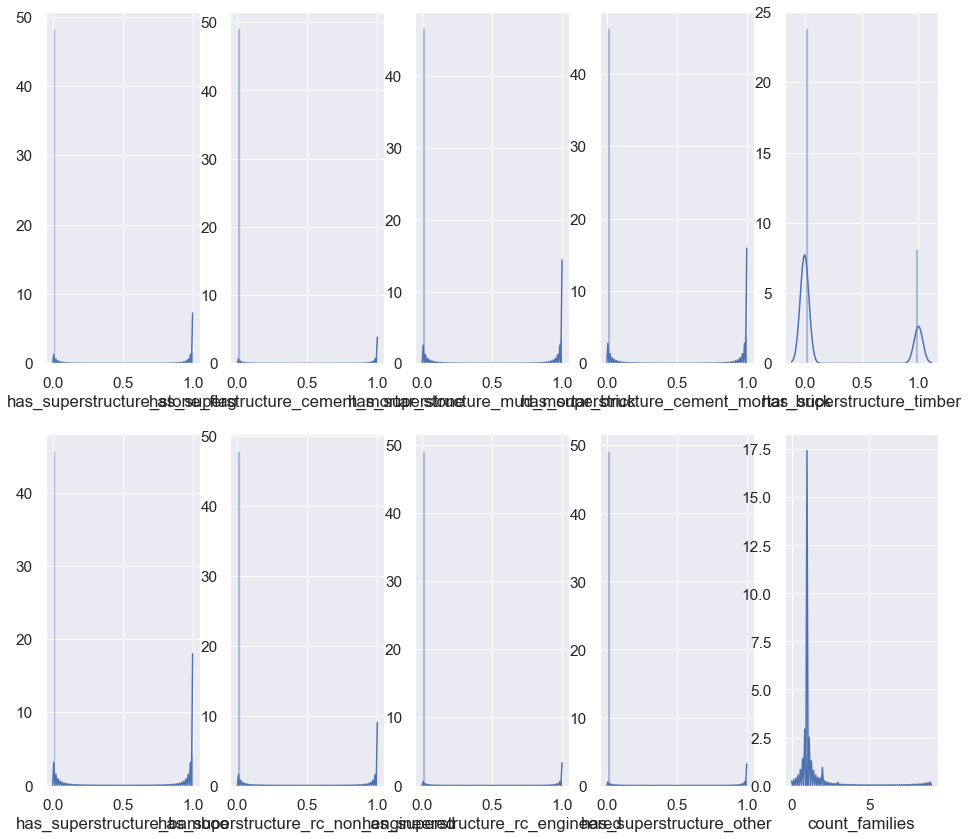

In [44]:
distributionPlot(extended_train_features.iloc[:, 10: 20], 5)

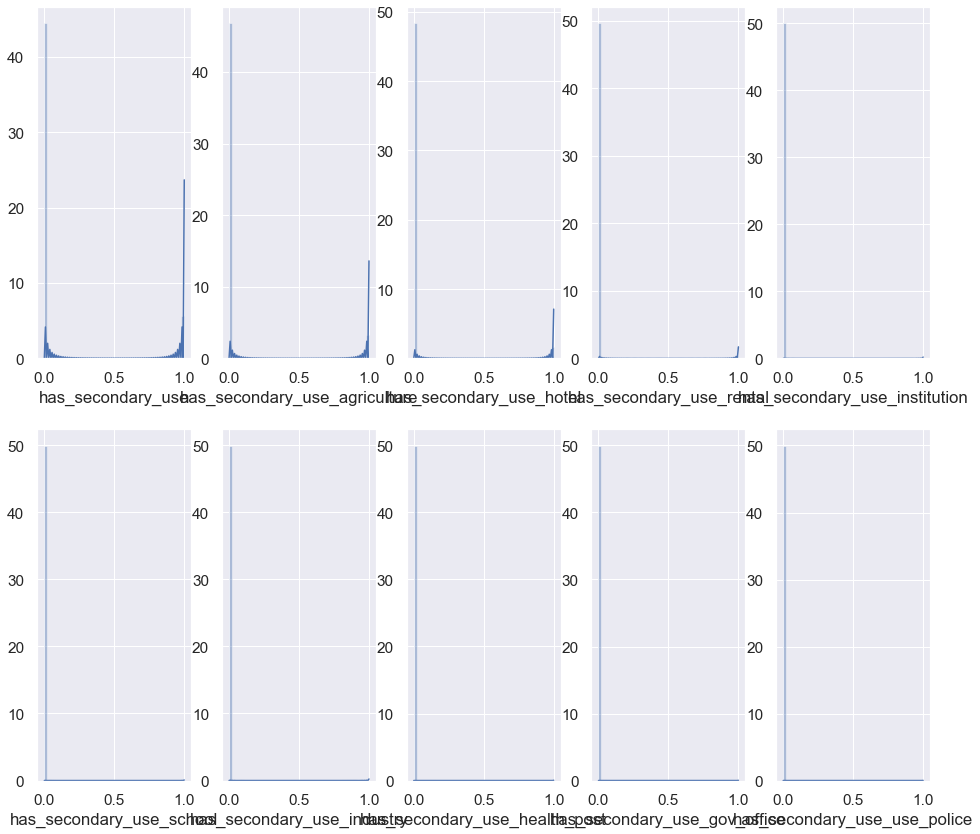

In [45]:
distributionPlot(extended_train_features.iloc[:, 20: 30], 5)

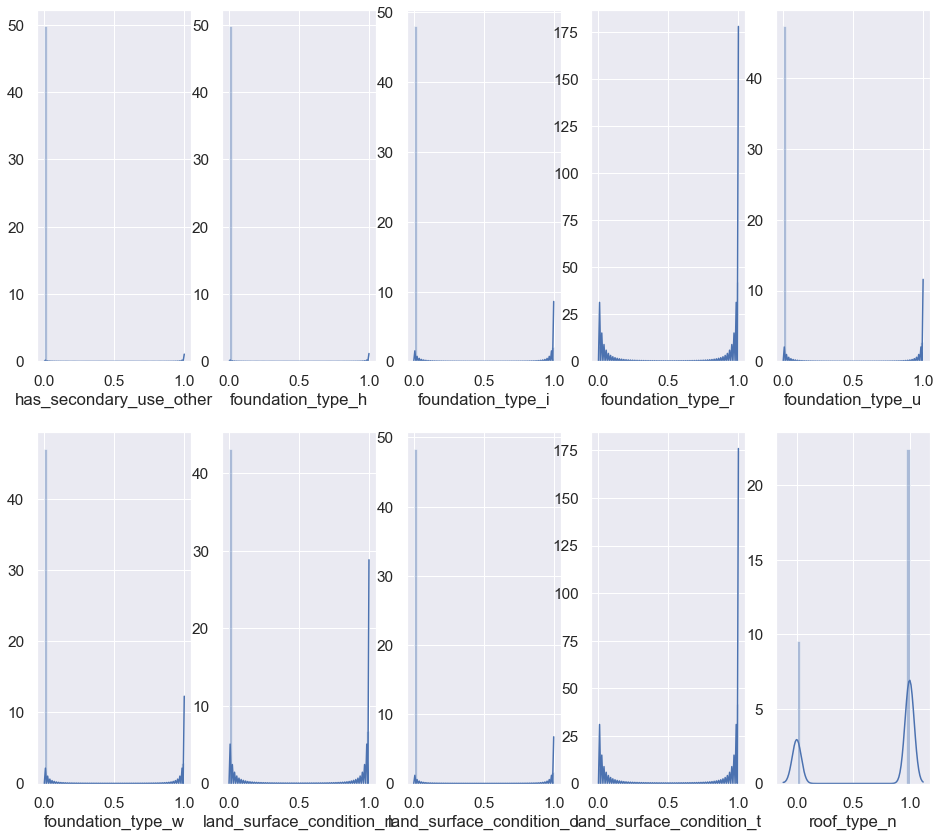

In [46]:
distributionPlot(extended_train_features.iloc[:, 30: 40], 5)

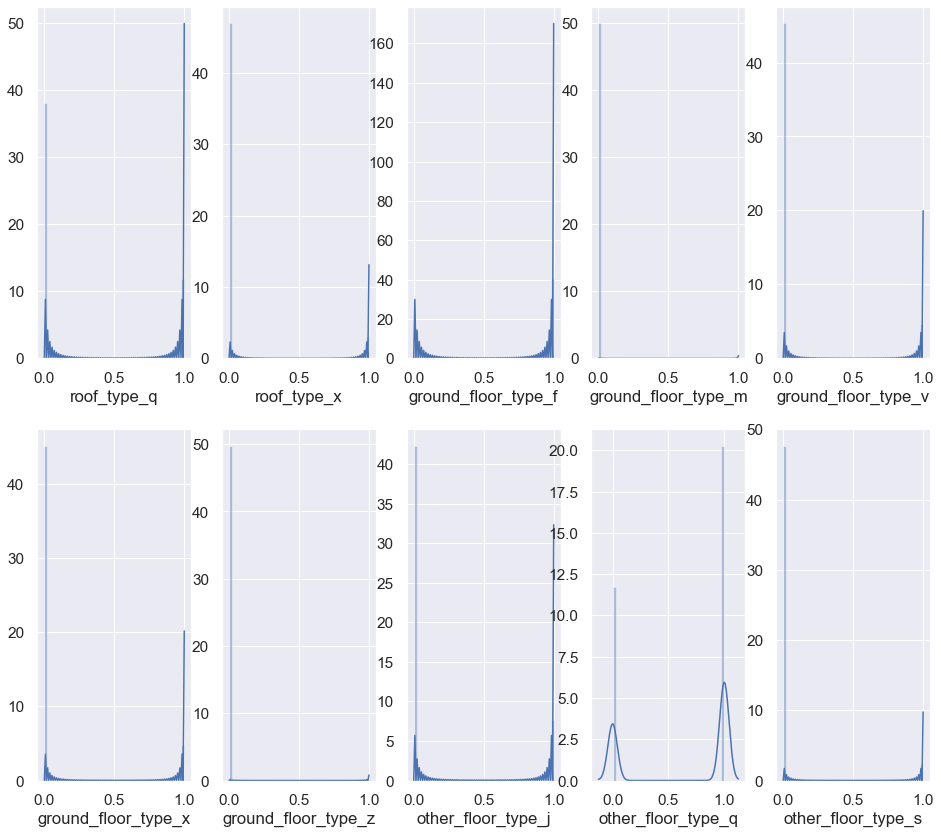

In [47]:
distributionPlot(extended_train_features.iloc[:, 40: 50], 5)

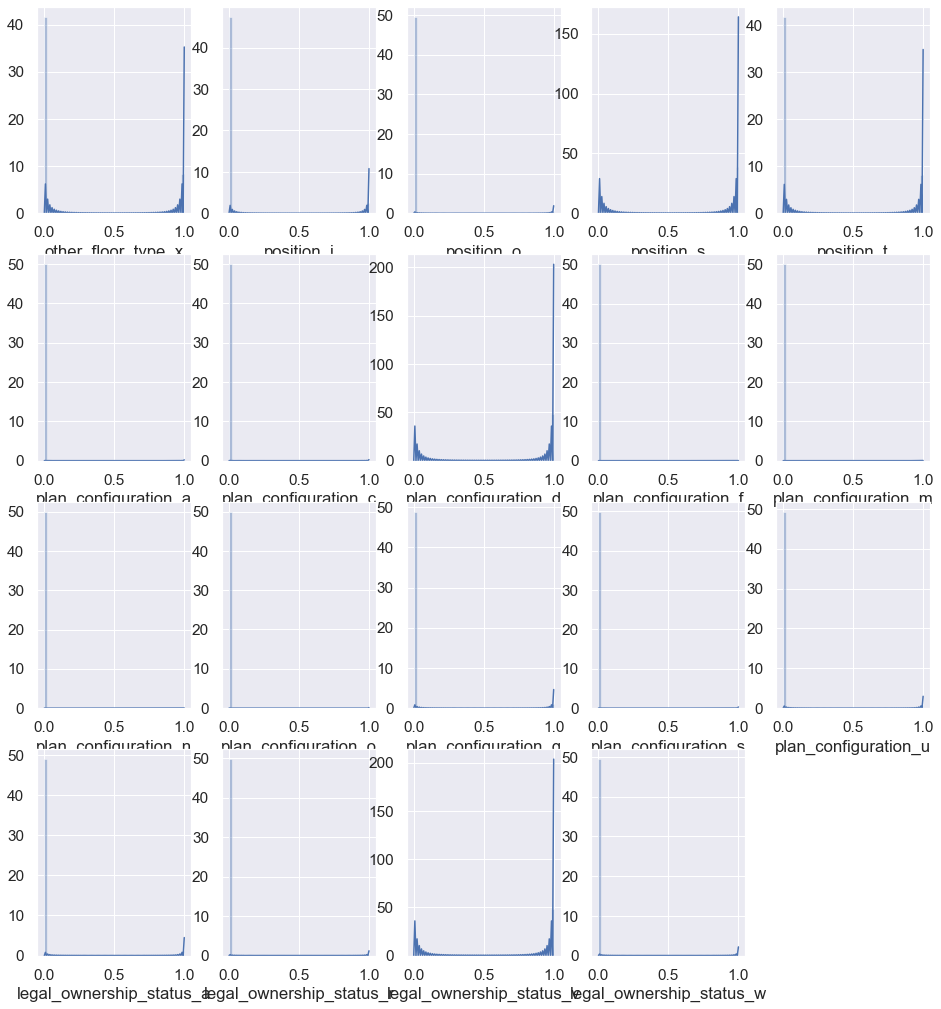

In [48]:
distributionPlot(extended_train_features.iloc[:, 50: 69], 5)

### Extracting balanced samples of each class

In [4]:
# from random import sample 

# level1 = raw_train_labels[raw_train_labels['damage_grade'] == 1]
# index1 = list(level1.index.values) 
# index1 = sample(index1,333)
# index1 = np.array(index1)

# level2 = raw_train_labels[raw_train_labels['damage_grade'] == 2]
# index2 = list(level2.index.values)
# index2 = sample(index2,333)
# index2 = np.array(index2)

# level3 = raw_train_labels[raw_train_labels['damage_grade'] == 3]
# index3 = list(level3.index.values)
# index3 = sample(index3,334)
# index3 = np.array(index3)

# index = np.concatenate((index1, index2, index3), axis=None)

In [6]:
labels = raw_train_labels['damage_grade']
labels = np.array(labels)
# labels = labels[index]

features = np.array(extended_train_features)
# features = features[index]

### Split data

In [108]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.3, random_state = 5, shuffle=True)
print(train_features.shape)
print(train_labels.shape)
print(test_features.shape)
print(test_labels.shape)
print("")
print('Distribition of data')
print('Class 1: ', sum(train_labels == 1))
print('Class 2: ', sum(train_labels == 2))
print('Class 3: ', sum(train_labels == 3))

(182420, 69)
(182420,)
(78181, 69)
(78181,)

Distribition of data
Class 1:  17527
Class 2:  103909
Class 3:  60984


### Helpers

In [32]:
def confusionMatrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    data_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
    data_cm.index.name = 'Actual'
    data_cm.columns.name = 'Predicted'

    sns.set(font_scale=1.4)
    fig, ax = plt.subplots(figsize=(12,6))
    
    ax.set(yticks=[-0.5, 1.5], 
       xticks=[0, 1], 
       yticklabels=data_cm.index, 
       xticklabels=data_cm.columns)

    sns.heatmap(data_cm, cmap="Blues", annot=True, fmt='', ax=ax)
    return data_cm

## Models

In [42]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

### SVM

In [11]:
svm_model = SVC(kernel = 'linear', random_state = 5)
svm_model.fit(train_features, train_labels)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=5, shrinking=True, tol=0.001,
    verbose=False)

In [12]:
svm_prediction = svm_model.predict(test_features)

0.41


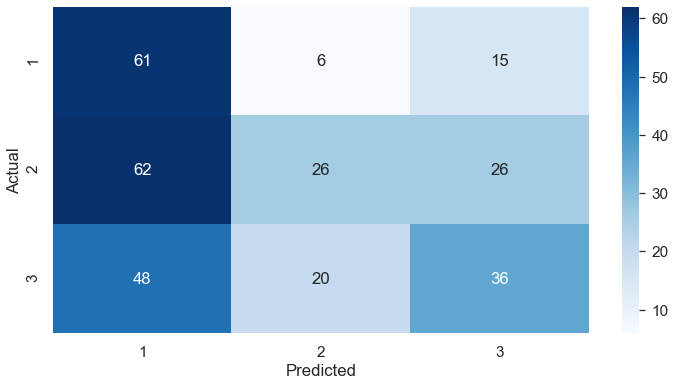

In [13]:

svm_cm = confusionMatrix(test_labels, svm_prediction)
svm_accuracy = accuracy_score(test_labels, svm_prediction)
print(accuracy)

### Random Forest

In [38]:
random_model = RandomForestClassifier(n_estimators = 100)
random_model.fit(train_features, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [39]:
random_prediction = random_model.predict(test_features)

0.716593545746409


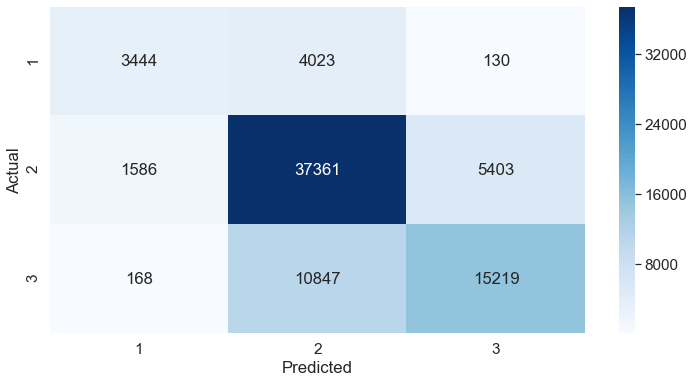

In [40]:
random_cm = confusionMatrix(test_labels, random_prediction)
random_accuracy = accuracy_score(test_labels, random_prediction)
print(random_accuracy)

### Logistic Regression

In [121]:
actual_weight_1 = sum(train_labels == 1) * 100 / (sum(train_labels == 1) + sum(train_labels == 2) + sum(train_labels == 3))
actual_weight_2 = sum(train_labels == 2) * 100 / (sum(train_labels == 1) + sum(train_labels == 2) + sum(train_labels == 3))
actual_weight_3 = sum(train_labels == 3) * 100 / (sum(train_labels == 1) + sum(train_labels == 2) + sum(train_labels == 3))
print(actual_weight_1)
print(actual_weight_2)
print(actual_weight_3)

9.608047363227715
56.96140774037934
33.43054489639294


In [130]:
print(sum(train_labels == 1) + sum(train_labels == 2) + sum(train_labels == 3))
print(sum(train_labels))

182420
408297


In [134]:
logistic_model = LogisticRegression(random_state = 5, multi_class = 'ovr', verbose = 1, class_weight = {1:0.23, 2:0, 3:0.001}).fit(train_features, train_labels)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.1s finished


In [135]:
logistic_prediction = logistic_model.predict(test_features)

0.09717194714828412


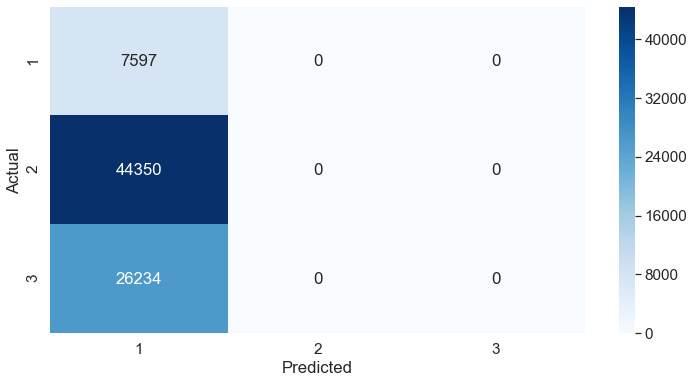

In [136]:
random_cm = confusionMatrix(test_labels, logistic_prediction)
logistic_accuracy = accuracy_score(test_labels, logistic_prediction)
print(logistic_accuracy)